In [7]:
## Download data from 
## https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
## change the header of the last column 'class' to 'GBT'
## save the file in csv format
import pandas as pd
df = pd.read_csv('../data/Data_Cortex_Nuclear.csv')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,GBT
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [12]:
## Generate input (X) and output (y)
## Use Genotype as class label (79th column, index=78)
import numpy as np
X = df.iloc[:, 1:78].values
y = df.iloc[:, 78].values
X[0:5, 0:5]
y[0:5]

array([[0.50364388, 0.74719322, 0.4301753 , 2.81632854, 5.99015166],
       [0.51461708, 0.68906355, 0.41177034, 2.78951404, 5.68503786],
       [0.50918309, 0.7302468 , 0.41830878, 2.68720107, 5.62205854],
       [0.44210669, 0.61707615, 0.35862631, 2.4669472 , 4.97950319],
       [0.43494024, 0.61742984, 0.3588022 , 2.36578488, 4.71867866]])

In [22]:
## Preprocessing: missing values and normalization
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X_imp = imp.transform(X)
print(X[738:750, 68:70])
print(X_imp[738:750, 68:70])
X_norm=StandardScaler().fit_transform(X_imp)
print(X_norm[738:750, 68:70])

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]
 [0.15791424 0.13476175]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [24]:
## Use LabelEncoder for numerical encoding of class labels
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
## Naive Bayes classifier on the transformed data
## performance evaluation: 5-fold cross validation 
## metric: auc
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
k=5
gnb = GaussianNB()
skf = StratifiedKFold(n_splits=k, shuffle=True)
sum_auc = 0
for train_index, test_index in skf.split(X_norm, y_enc):
    gnb = gnb.fit(X_norm[train_index], y_enc[train_index])
    pred = gnb.predict(X_norm[test_index])
    auc = roc_auc_score(y_enc[test_index], pred)
    sum_auc += auc
avg_auc = sum_auc / k
avg_auc

0.7575335397316821

In [26]:
?StratifiedKFold

Init signature: StratifiedKFold(n_splits='warn', shuffle=False, random_state=None)
Docstring:     
Stratified K-Folds cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns
stratified folds. The folds are made by preserving the percentage of
samples for each class.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
n_splits : int, default=3
    Number of folds. Must be at least 2.

    .. versionchanged:: 0.20
        ``n_splits`` default value will change from 3 to 5 in v0.22.

shuffle : boolean, optional
    Whether to shuffle each class's samples before splitting into batches.

random_state : int, RandomState instance or None, optional, default=None
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance use

In [30]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

In [31]:
## Naive Bayes classifier on the transformed data
## performance evaluation: 5-fold cross validation 
## metric: auc
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
k=5
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=k, shuffle=True)
sum_auc = 0
for train_index, test_index in skf.split(X_norm, y_enc):
    rf = rf.fit(X_norm[train_index], y_enc[train_index])
    pred = rf.predict(X_norm[test_index])
    auc = roc_auc_score(y_enc[test_index], pred)
    sum_auc += auc
avg_auc = sum_auc / k
avg_auc

/Users/auyar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9781733746130031

In [32]:
print(rf.feature_importances_)

[0.01115355 0.06305275 0.01433555 0.00489803 0.00565676 0.01323217
 0.00666024 0.00640064 0.00886242 0.00927202 0.01800825 0.00404591
 0.00657243 0.00508083 0.02228039 0.0061426  0.01170015 0.01097746
 0.00150632 0.00841514 0.01409301 0.00559576 0.00884975 0.00599314
 0.02486564 0.00956067 0.00536219 0.0026232  0.00585706 0.00724409
 0.12093345 0.00319481 0.00999495 0.02668949 0.01886977 0.00088212
 0.01165198 0.01374013 0.01912234 0.01864636 0.00889345 0.01914571
 0.00299084 0.00683236 0.0095788  0.00186942 0.02240852 0.00233659
 0.0194487  0.01534396 0.0192871  0.01059221 0.00164541 0.01378775
 0.00596461 0.00438216 0.05461413 0.00624874 0.04748555 0.00550756
 0.0036181  0.00595326 0.01082163 0.01003175 0.00337025 0.01632416
 0.00430345 0.00549885 0.00583617 0.00471396 0.00605777 0.00518018
 0.01080473 0.02019445 0.01058783 0.00550618 0.02081017]


In [34]:
#rf.estimators_

In [52]:
## kMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=0).fit(X_norm)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
prinComps = pca.fit_transform(X_norm)
print(prinComps)
pca.explained_variance_ratio_

[[ 4.71133506  5.3273509 ]
 [ 3.09626108  5.43081117]
 [ 3.21441425  5.63755096]
 ...
 [-7.42786229 -2.67191489]
 [-6.34516237 -3.25979342]
 [-2.99391751 -4.00843593]]


array([0.25341366, 0.17043593])

In [45]:
#?PCA

In [44]:
pca.components_

array([[ 0.05171733,  0.08059432,  0.19669214,  0.19702646,  0.18260859,
         0.11840865,  0.12271042,  0.10100945,  0.1663294 ,  0.09057533,
         0.05042859,  0.16601044,  0.15598346,  0.15162283,  0.19310544,
         0.14191731,  0.19310636,  0.09030495,  0.09359098,  0.17876411,
         0.04746275,  0.15585074,  0.11110046,  0.16965337,  0.16547197,
         0.12815505,  0.16546729,  0.19532725,  0.19387258,  0.10589267,
         0.13620172,  0.18568994,  0.04838688,  0.13053758,  0.0528627 ,
         0.15273161,  0.11654024,  0.16420603,  0.15682506,  0.13127991,
         0.11744701,  0.14265446,  0.01077622,  0.10176844,  0.09517894,
         0.05963659,  0.00264498,  0.09026273,  0.01617107,  0.13600155,
        -0.02503635,  0.00603641,  0.1143272 ,  0.09143817,  0.09116169,
         0.08777985,  0.00448897,  0.00618258,  0.00231893,  0.04218902,
        -0.01800202,  0.0512724 ,  0.06254348,  0.06709001, -0.00130577,
         0.08259214,  0.04283454, -0.012673  , -0.0

In [49]:
## generate a df for principal components
prDf = pd.DataFrame(data = prinComps, columns=['PC1', 'PC2'])
finalDf = pd.concat([prDf, df['Genotype']], axis=1)
#finalDf

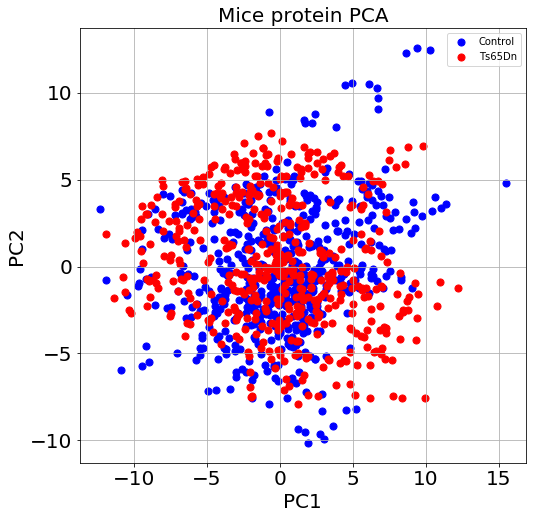

In [51]:
## Plot PCA
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('Mice protein PCA', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)
targets = ['Control', 'Ts65Dn']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indices = finalDf['Genotype'] == target
    plt.scatter(finalDf.loc[indices, 'PC1']
               , finalDf.loc[indices, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()

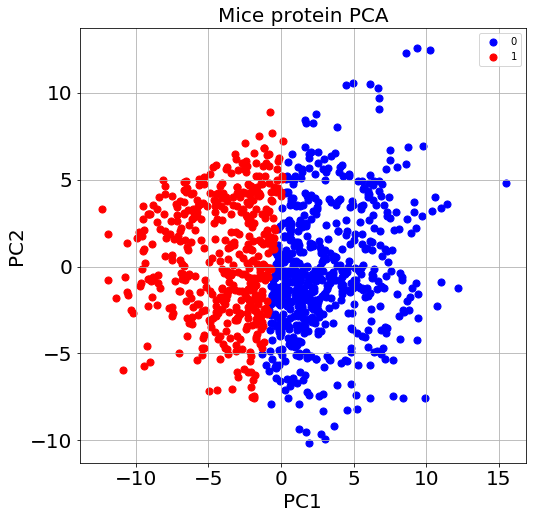

In [54]:
plt.figure(figsize = (8, 8))
plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('Mice protein PCA', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)
targets = [0,1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indices = kmeans.labels_ == target
    plt.scatter(finalDf.loc[indices, 'PC1']
               , finalDf.loc[indices, 'PC2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()